<a href="https://colab.research.google.com/github/Ingridpin/Analise_de_Dados_DataHackers-2022/blob/main/Analise_de_Dados_DataHackers_2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Introdução**

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4271 entries, 0 to 4270
Data columns (total 28 columns):
 #   Column                                                                                                                     Non-Null Count  Dtype  
---  ------                                                                                                                     --------------  -----  
 0   Unnamed: 0                                                                                                                 4271 non-null   int64  
 1   ID                                                                                                                         4271 non-null   object 
 2   IDADE                                                                                                                      4197 non-null   float64
 3

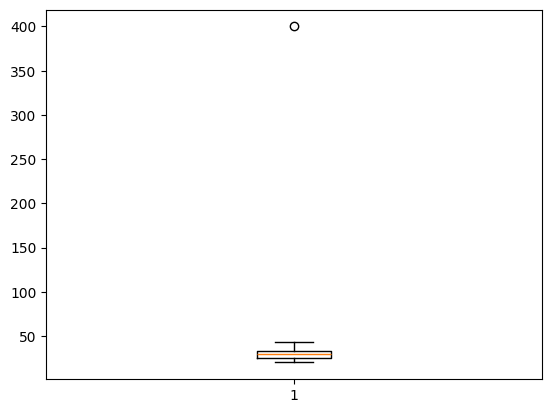

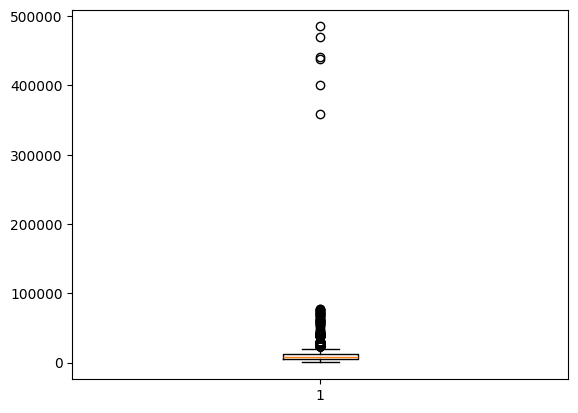

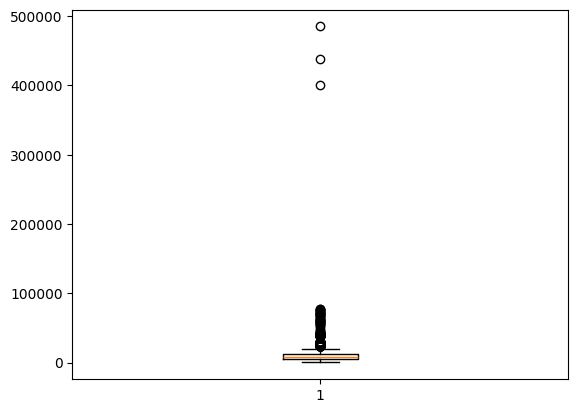

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
SELECT Municipios_Brasileiros.Estado, AVG(Municipio_Status.Renda) FROM Municipios_Brasileiros
           INNER JOIN Municipio_Status ON Municipios_Brasileiros.municipio_ID = Municipio_Status.municipio_ID
           WHERE Municipios_Brasileiros.Estado IN (?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?) GROUP BY Municipios_Brasileiros.Estado;


/tmp/ipython-input-4-2393819120.py:611: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


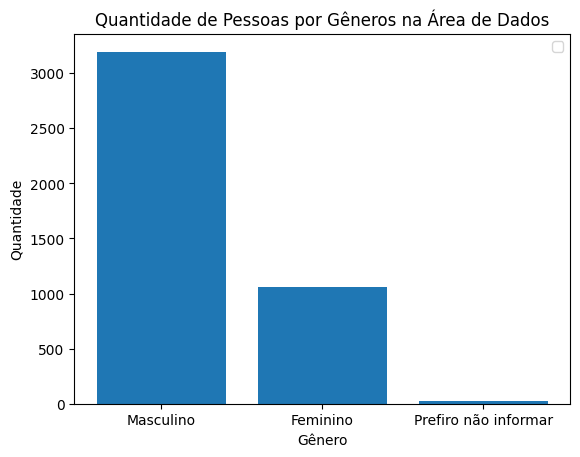

/tmp/ipython-input-4-2393819120.py:623: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=dados, x='GENERO', palette='pastel')


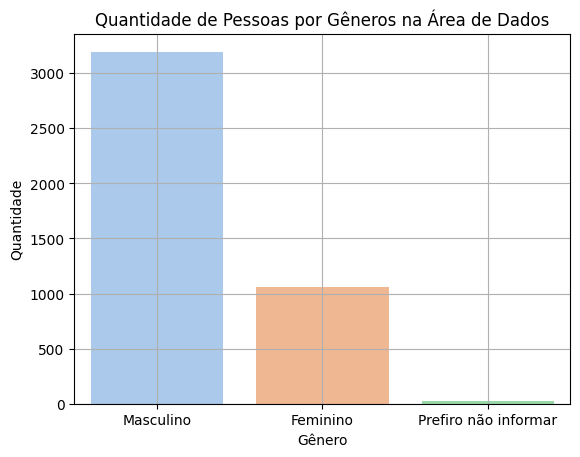

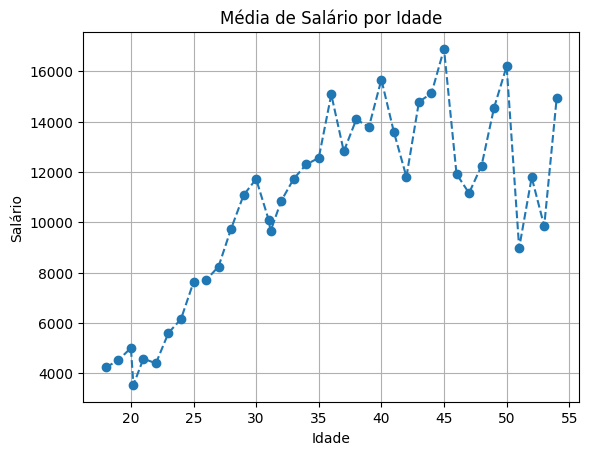

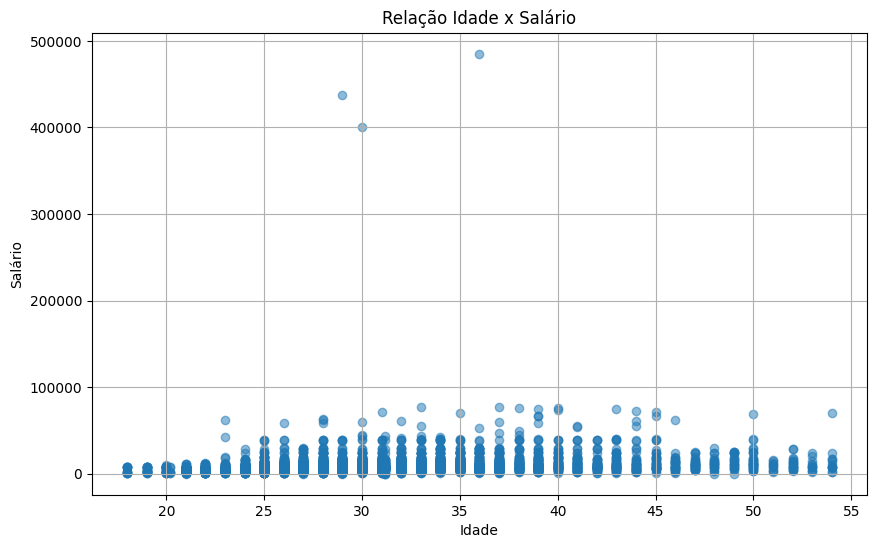

In [4]:
# Este notebook contém um projeto de análise de dados exploratória e descritiva
# utilizando a pesquisa da Comunidade Data Hackers de 2022. O objetivo é
# extrair insights sobre o perfil dos profissionais de dados no Brasil,
# incluindo aspectos demográficos, salariais e de diversidade.

### Importações
# Importação de bibliotecas necessárias para a análise.
from google.colab import drive # Importa a biblioteca 'drive' para interagir com o Google Drive no Google Colab.
import pandas as pd # Importa a biblioteca 'pandas', essencial para manipulação e análise de dados tabulares.
                     # 'pd' é um alias comum e convencional para pandas.
import numpy as np   # Importa a biblioteca 'numpy', fundamental para operações numéricas e estatísticas,
                     # especialmente com arrays e matrizes. 'np' é um alias comum.
import matplotlib.pyplot as plt # Importa o módulo 'pyplot' da biblioteca 'matplotlib',
                                # utilizado para criar visualizações estáticas e interativas. 'plt' é um alias comum.
import seaborn as sns # Importa a biblioteca 'seaborn', construída sobre o matplotlib,
                      # para criar gráficos estatísticos mais atraentes e informativos. 'sns' é um alias comum.
import plotly.express as px # Importa o módulo 'express' da biblioteca 'plotly',
                            # facilitando a criação de gráficos interativos e dinâmicos com poucas linhas de código. 'px' é um alias comum.
from scipy import stats # Importa o módulo 'stats' da biblioteca 'scipy',
                        # que contém funções para estatística descritiva e inferencial, incluindo distribuições.
import sqlite3 # Importa a biblioteca 'sqlite3' para interagir com bancos de dados SQLite.

### Configuração e Carregamento de Dados

# Montando o Google Drive para acessar os arquivos
drive.mount('/content/drive/')

# Lendo os dados da planilha Excel para um DataFrame Pandas
# O caminho especificado aponta para o arquivo 'planilha_modulo3.xlsx' no Google Drive.
dados = pd.read_excel('/content/drive/MyDrive/Análise de Dados: Meus primeiros passos em python!/planilha_modulo3.xlsx')

### Análise Exploratória Inicial dos Dados

# Exibe a quantidade de linhas (registros) no DataFrame.
# 'len()' retorna o número de itens em um objeto.
len(dados)

# Mostra as dimensões do DataFrame (número de linhas, número de colunas).
# 'shape' é um atributo que retorna uma tupla (linhas, colunas).
dados.shape

# Retorna uma lista com os nomes de todas as colunas do DataFrame.
# 'columns' é um atributo que contém o rótulo de cada coluna.
dados.columns

# Exibe um resumo conciso do DataFrame, incluindo o tipo de dado de cada coluna,
# o número de valores não nulos e o uso de memória. Útil para verificar a integridade dos dados.
dados.info()

# Gera estatísticas descritivas para as colunas numéricas do DataFrame,
# como contagem, média, desvio padrão, mínimo, quartis (25%, 50%, 75%) e máximo.
dados.describe()

### Filtragem e Seleção de Dados

# Seleciona e exibe todas as linhas onde a coluna 'GENERO' é exatamente 'Feminino'.
dados[dados['GENERO'] == 'Feminino']

# Seleciona e exibe as linhas onde a coluna 'GENERO' contém a substring 'não'.
# 'str.contains()' é usado para verificar a ocorrência de uma substring em colunas de texto.
# 'na=False' trata valores NaN como False, para evitar erros.
dados[dados['GENERO'].str.contains('não', na=False)]

# Seleciona e exibe as linhas onde a coluna 'IDADE' é maior ou igual a 30.
dados[dados['IDADE'] >= 30]

# Combina duas condições de filtragem usando o operador lógico '&' (AND).
# Seleciona linhas onde 'IDADE' é maior que 30 E 'GENERO' é 'Feminino'.
dados[(dados['IDADE'] > 30) & (dados['GENERO'] == 'Feminino')]

# Combina duas condições para 'COR/RACA/ETNIA' e 'IDADE'.
# Seleciona linhas onde 'COR/RACA/ETNIA' é 'Amarela' E 'IDADE' é menor que 40.
dados[(dados['COR/RACA/ETNIA'] == 'Amarela') & (dados['IDADE'] < 40)]

### Agrupamento e Contagem de Valores

# Agrupa o DataFrame pela coluna 'GENERO' e, para cada grupo, conta o número de IDs únicos.
# 'dropna=False' garante que valores nulos na coluna 'GENERO' também sejam considerados como um grupo.
# 'nunique()' conta o número de valores únicos.
dados.groupby('GENERO', dropna=False)['ID'].nunique()

# Conta a frequência de cada valor único na coluna 'GENERO'.
# 'value_counts()' retorna uma Série contendo contagens de valores únicos.
# 'dropna=False' inclui a contagem de valores nulos (NaN) se houver.
dados['GENERO'].value_counts(dropna=False)

# Primeiro, filtra o DataFrame para linhas onde 'IDADE' é maior ou igual a 30 E 'GENERO' é 'Feminino'.
# Em seguida, conta a frequência de cada valor na coluna 'NIVEL' para essas linhas filtradas.
dados[(dados['IDADE'] >= 30) & (dados['GENERO'] == 'Feminino')]['NIVEL'].value_counts()

# Cria uma tabela dinâmica (pivot table) para analisar a relação entre 'GENERO' e 'GESTOR?'.
# 'values=['ID']' indica que a contagem será feita na coluna 'ID'.
# 'index=['GENERO']' define 'GENERO' como as linhas da tabela.
# 'columns=['GESTOR?']' define 'GESTOR?' como as colunas da tabela.
# 'aggfunc='count'' especifica que a função de agregação será a contagem de IDs.
pd.pivot_table(dados, values=['ID'], index=['GENERO'], columns=['GESTOR?'], aggfunc='count')

### Estatística Descritiva Básica (com listas e aplicação no DataFrame)

# Exemplo de lista para demonstração de conceitos estatísticos.
lista_idades = [26, 30, 32, 22, 26, 35, 40, 20, 43, 31, 23]

# Calcula a soma de todos os elementos na 'lista_idades' usando NumPy.
np.sum(lista_idades)

# Retorna o número de elementos na 'lista_idades'.
len(lista_idades)

# Calcula a média aritmética da 'lista_idades' manualmente (soma / quantidade).
np.sum(lista_idades) / len(lista_idades)

# Calcula a média aritmética da 'lista_idades' usando a função 'mean()' do NumPy.
media = np.mean(lista_idades)
print("Média aritmética:", media)

# Altera a 'lista_idades' adicionando um valor atípico (100) para demonstrar o impacto em certas métricas.
lista_idades = [26, 30, 32, 22, 26, 35, 40, 20, 43, 31, 23, 100]

# Ordena a 'lista_idades' em ordem crescente.
lista_idades.sort()
lista_idades # Exibe a lista ordenada.

# Calcula a mediana da 'lista_idades' usando a função 'median()' do NumPy.
# A mediana é o valor do meio em um conjunto de dados ordenado.
mediana = np.median(lista_idades)
print("Mediana:", mediana)

#### Voltando para o DataFrame (Estatísticas Descritivas com Pandas)

# Calcula a média da coluna 'IDADE' no DataFrame.
dados['IDADE'].mean()

# Calcula a mediana da coluna 'IDADE' no DataFrame.
dados['IDADE'].median()

# Calcula a moda (valor(es) mais frequente(s)) da coluna 'IDADE' no DataFrame.
dados['IDADE'].mode()

# Calcula o desvio padrão da coluna 'IDADE', que mede a dispersão dos dados em torno da média.
dados['IDADE'].std()

# Encontra o valor mínimo na coluna 'IDADE'.
dados['IDADE'].min()

# Encontra o valor máximo na coluna 'IDADE'.
dados['IDADE'].max()

# Calcula a média da 'IDADE' apenas para pessoas do gênero 'Feminino'.
dados[dados['GENERO'] == 'Feminino']['IDADE'].mean()

# Calcula a média do 'SALARIO' apenas para pessoas do gênero 'Feminino'.
dados[dados['GENERO'] == 'Feminino']['SALARIO'].mean()

# Calcula a média do 'SALARIO' apenas para pessoas do gênero 'Masculino'.
dados[dados['GENERO'] == 'Masculino']['SALARIO'].mean()

# Calcula a média da 'IDADE' apenas para pessoas do gênero 'Masculino'.
dados[dados['GENERO'] == 'Masculino']['IDADE'].mean()

### Tratamento de Valores Faltantes (Missing Values)

# Exibe um resumo conciso do DataFrame, incluindo o tipo de dado de cada coluna
# e o número de valores não nulos. É crucial para identificar colunas com valores faltantes.
dados.info()

#### Trabalhando na Coluna 'GENERO'

# Agrupa pela coluna 'GENERO' (incluindo nulos com dropna=False) e conta o número de IDs únicos
# para ver a distribuição de gêneros e a quantidade de nulos.
dados.groupby('GENERO', dropna=False)['ID'].nunique()

# Mostra uma prévia de como os valores nulos na coluna 'GENERO' seriam substituídos por 'Prefiro não informar'.
# Esta linha apenas exibe o resultado, mas não altera o DataFrame original.
dados['GENERO'].fillna('Prefiro não informar')

# Preenche os valores nulos (NaN) na coluna 'GENERO' com a string 'Prefiro não informar'.
# A atribuição 'dados['GENERO'] = ...' é essencial para que a mudança seja permanente no DataFrame.
dados['GENERO'] = dados['GENERO'].fillna('Prefiro não informar')

# Verifica novamente a contagem de valores únicos em 'GENERO' após o preenchimento,
# confirmando que os nulos foram substituídos.
dados.groupby('GENERO', dropna=False)['ID'].nunique()

#### Trabalhando na Coluna 'IDADE'

# Conta a ocorrência de valores nulos (True) e não nulos (False) na coluna 'IDADE'.
# 'isnull()' retorna um DataFrame booleano indicando se cada valor é nulo.
# 'value_counts()' soma as ocorrências de True/False.
dados['IDADE'].isnull().value_counts() # Indica que há 74 valores nulos na coluna idade.

# Retorna os nomes de todas as colunas no DataFrame. Útil para verificar a disponibilidade de colunas.
dados.columns

# Filtra o DataFrame para exibir apenas as linhas onde 'IDADE' é nulo e,
# para essas linhas, conta a frequência dos valores na coluna 'FAIXA IDADE'.
# Isso ajuda a entender quais faixas etárias têm mais valores de idade ausentes.
dados[dados['IDADE'].isnull()]['FAIXA IDADE'].value_counts()

# Calcula a média da 'IDADE' para o grupo de 'FAIXA IDADE' igual a '17-21'.
# Essa média será usada para preencher os valores nulos nessa faixa específica.
media_17_21 = dados[dados['FAIXA IDADE'] == '17-21']['IDADE'].mean()

# Localiza as linhas onde 'IDADE' é nulo E 'FAIXA IDADE' é '17-21',
# e substitui os valores nulos de 'IDADE' pela 'media_17_21' calculada.
# 'loc' é usado para seleção baseada em rótulos/condições e modificação de valores.
dados.loc[dados['IDADE'].isnull() & (dados['FAIXA IDADE'] == '17-21'), 'IDADE'] = media_17_21

# Verifica novamente a contagem de 'FAIXA IDADE' para 'IDADE' nula.
# Espera-se que os 6 valores nulos para a faixa '17-21' tenham sido preenchidos.
dados[dados['IDADE'].isnull()]['FAIXA IDADE'].value_counts() # Confirma que os 6 valores foram substituídos.

# Exibe os valores da coluna 'IDADE' para a 'FAIXA IDADE' '55+'.
dados[dados['FAIXA IDADE'] == '55+']['IDADE']

# Exibe os valores da coluna 'NIVEL' para a 'FAIXA IDADE' '55+'.
dados[dados['FAIXA IDADE'] == '+55']['NIVEL'] # Nota: O '55+' e '+55' podem ser inconsistências na digitação da faixa etária.

# Calcula a média geral da coluna 'IDADE' para ser usada como um valor de preenchimento.
media_geral = dados['IDADE'].mean()
media_geral

# Localiza as linhas onde 'FAIXA IDADE' é '55+' E 'IDADE' é nulo,
# e preenche esses valores nulos de 'IDADE' com a 'media_geral'.
dados.loc[(dados['FAIXA IDADE'] == '55+') & (dados['IDADE'].isnull()), 'IDADE'] = media_geral

# Verifica se ainda há valores nulos na coluna 'IDADE' associados a alguma 'FAIXA IDADE'.
# Espera-se que não haja valores, indicando que os 68 valores nulos na faixa '55+' foram preenchidos.
dados[dados['IDADE'].isnull()]['FAIXA IDADE'].value_counts() # Não retorna valores, indicando sucesso no preenchimento.

### Tratando a Coluna 'SALARIO'

# Exibe todas as linhas onde a coluna 'SALARIO' possui valores nulos.
# Útil para inspecionar os registros afetados.
dados[dados['SALARIO'].isnull()] # Indica que há 577 linhas com valores nulos na coluna 'SALARIO'.

# Filtra as linhas onde 'SALARIO' é nulo e, para essas linhas,
# conta a frequência dos valores na coluna 'FAIXA SALARIAL'.
# Ajuda a entender se os nulos estão concentrados em alguma faixa salarial específica.
dados[dados['SALARIO'].isnull()]['FAIXA SALARIAL'].value_counts()

# Calcula a mediana da coluna 'SALARIO'. A mediana é frequentemente preferida à média
# para preencher valores faltantes de salário, pois é menos sensível a outliers.
mediana_salario = dados['SALARIO'].median()

# Preenche todos os valores nulos na coluna 'SALARIO' com a 'mediana_salario' calculada.
dados.loc[dados['SALARIO'].isnull(), 'SALARIO'] = mediana_salario # Todos os nulos agora contêm o valor da mediana.

### Tratamento de Valores Discrepantes (Outliers)

# Exemplo de lista com um outlier (400) para demonstrar o impacto.
lista_idades_new = [26, 30, 32, 22, 26, 35, 400, 20, 43, 31, 23]

# Média com o outlier.
media = np.mean(lista_idades_new)
media

# Desvio padrão com o outlier.
desvio = np.std(lista_idades_new)
desvio

# Calcula o limite superior para outliers usando a regra do 3 desvios padrão acima da média.
media + 3 * desvio

# Calcula o limite inferior para outliers usando a regra do 3 desvios padrão abaixo da média.
media - 3 * desvio

# Cria um boxplot para visualizar a distribuição da 'lista_idades_new' e identificar outliers visualmente.
# 'boxplot()' é uma função de Matplotlib para criar diagramas de caixa.
plt.boxplot(lista_idades_new)
plt.show() # Exibe o gráfico.

# Cria um boxplot para visualizar a distribuição da coluna 'SALARIO' do DataFrame.
# Isso ajuda a identificar outliers na distribuição salarial.
plt.boxplot(dados['SALARIO'])
plt.show() # Exibe o gráfico.

# Calcula o Primeiro Quartil (Q1) da coluna 'SALARIO'.
# Q1 representa o 25º percentil dos dados.
Q1 = dados['SALARIO'].quantile(0.25)
Q1

# Calcula o Terceiro Quartil (Q3) da coluna 'SALARIO'.
# Q3 representa o 75º percentil dos dados.
Q3 = dados['SALARIO'].quantile(0.75)
Q3

# Calcula o Intervalo Interquartil (IIQ), que é a diferença entre Q3 e Q1.
# O IIQ é uma medida de dispersão estatística e é usado na regra do 1.5*IIQ para outliers.
IIQ = Q3 - Q1
IIQ

# Calcula o limite superior para outliers usando a regra do 1.5 * IIQ acima de Q3.
lim_superior = Q3 + (1.5 * IIQ)
lim_superior

# Calcula o limite inferior para outliers usando a regra do 1.5 * IIQ abaixo de Q1.
limite_inferior = Q1 - (1.5 * IIQ)
limite_inferior

# Conta a frequência de cada valor na coluna 'FAIXA SALARIAL'.
dados['FAIXA SALARIAL'].value_counts()

# Calcula a média da coluna 'SALARIO' (após preenchimento de nulos).
media_salario = dados['SALARIO'].mean()
media_salario

# Calcula o desvio padrão da coluna 'SALARIO' (após preenchimento de nulos).
desvio_salario = dados['SALARIO'].std()
desvio_salario

# Calcula o limite superior para outliers usando a regra do 3 desvios padrão acima da média para 'SALARIO'.
limite_superior = media_salario + (3 * desvio_salario)
limite_superior

# Calcula o limite inferior para outliers usando a regra do 3 desvios padrão abaixo da média para 'SALARIO'.
limite_inferior = media_salario - (3 * desvio_salario)
limite_inferior

# Filtra e conta a frequência da 'FAIXA SALARIAL' para salários que estão acima do limite superior calculado.
# Isso ajuda a identificar quais faixas salariais contêm os outliers de salário.
dados[(dados['SALARIO'] > limite_superior)]['FAIXA SALARIAL'].value_counts()

# Calcula a média dos salários para a faixa 'de R$ 30.001/mês a R$ 40.000/mês',
# excluindo os salários que já foram identificados como outliers (maiores que o limite_superior).
# Essa média será usada para substituir os outliers nessa faixa.
media_30_40 = dados[(dados['FAIXA SALARIAL'] == 'de R$ 30.001/mês a R$ 40.000/mês') & (dados['SALARIO'] < limite_superior)]['SALARIO'].mean()

# Localiza as linhas onde a 'FAIXA SALARIAL' é 'de R$ 30.001/mês a R$ 40.000/mês'
# E o 'SALARIO' é um outlier (maior que 'limite_superior'),
# e substitui esses salários pelo 'media_30_40' calculada.
dados.loc[(dados['FAIXA SALARIAL'] == 'de R$ 30.001/mês a R$ 40.000/mês') & (dados['SALARIO'] > limite_superior), 'SALARIO'] = media_30_40

# Verifica novamente a contagem de 'FAIXA SALARIAL' para salários que ainda estão acima do limite superior.
# Espera-se que a contagem para a faixa 'de R$ 30.001/mês a R$ 40.000/mês' seja zero após a substituição.
dados[dados['SALARIO'] > limite_superior]['FAIXA SALARIAL'].value_counts()

# Calcula a média dos salários para a faixa 'Acima de R$ 40.001/mês',
# excluindo os salários que são outliers (maiores que o limite_superior).
# Essa média será usada para substituir os outliers nessa faixa.
media_40 = dados[(dados['FAIXA SALARIAL'] == ' Acima de R$ 40.001/mês') & (dados['SALARIO'] < limite_superior)]['SALARIO'].mean()
media_40

# Localiza as linhas onde a 'FAIXA SALARIAL' é 'Acima de R$ 40.001/mês'
# E o 'SALARIO' é um outlier (maior que 'limite_superior'),
# e substitui esses salários pelo 'media_40' calculada.
dados.loc[(dados['FAIXA SALARIAL'] == ' Acima de R$ 40.001/mês') & (dados['SALARIO'] > limite_superior), 'SALARIO'] = media_40

# Verifica se ainda há outliers de salário após as substituições.
# Espera-se que a contagem para a faixa 'Acima de R$ 40.001/mês' seja zero.
dados[dados['SALARIO'] > limite_superior]['FAIXA SALARIAL'].value_counts()

# Gera um boxplot atualizado da coluna 'SALARIO' após o tratamento de outliers.
# Espera-se que a distribuição esteja mais compacta e com menos pontos extremos.
plt.boxplot(dados['SALARIO'])
plt.show() # Exibe o gráfico.

### Intervalo de Confiança e Distribuição Amostral

# Cria uma cópia da coluna 'SALARIO' para realizar análises de inferência.
salarios = dados['SALARIO']

# Exibe os valores da série 'salarios'.
salarios

# Calcula a média amostral dos salários.
media_amostral = np.mean(salarios)
media_amostral

# Calcula o desvio padrão amostral dos salários.
desvio_amostral = np.std(salarios)
desvio_amostral

# Define o nível de confiança desejado para o intervalo (95%).
nivel_confianca = 0.95

# Obtém o tamanho da amostra (número de observações de salário).
tamanho_amostral = len(salarios)
tamanho_amostral

# Calcula o erro padrão da média, que é o desvio padrão da distribuição amostral da média.
# 'stats.sem()' (Standard Error of the Mean) é a função apropriada.
erro_padrao = stats.sem(salarios)
erro_padrao

# Calcula o intervalo de confiança para a média populacional, usando a distribuição t de Student.
# 'nivel_confianca': nível de confiança (ex: 0.95 para 95%).
# 'tamanho_amostral-1': graus de liberdade (n-1).
# 'loc=media_amostral': a média da amostra.
# 'scale=erro_padrao': o erro padrão da média.
intervalo_confianca = stats.t.interval(nivel_confianca, tamanho_amostral - 1, loc=media_amostral, scale=erro_padrao)
intervalo_confianca

## Feature Engineering (Criação de Novas Colunas/Variáveis)

# Define uma função para criar a nova coluna 'NOVO_NIVEL' com base em 'GESTOR?' e 'NIVEL'.
# Se a pessoa for gestora (GESTOR? == 1), o 'NOVO_NIVEL' será "Pessoa gestora".
# Caso contrário, manterá o valor original da coluna 'NIVEL'.
def preencher_nivel(gestor, nivel):
    if gestor == 1:
        return "Pessoa gestora"
    else:
        return nivel

# Aplica a função 'preencher_nivel' a cada linha do DataFrame.
# 'axis=1' garante que a função seja aplicada linha a linha, acessando 'GESTOR?' e 'NIVEL' de cada registro.
# O resultado é armazenado na nova coluna 'NOVO_NIVEL'.
dados['NOVO_NIVEL'] = dados.apply(lambda x: preencher_nivel(x['GESTOR?'], x['NIVEL']), axis=1)

# Conta a frequência de cada valor na nova coluna 'NOVO_NIVEL' para verificar a distribuição.
dados['NOVO_NIVEL'].value_counts()

# Exibe a coluna 'NIVEL' original para comparação.
dados['NIVEL']

# Realiza One-Hot Encoding na coluna 'NIVEL'.
# Isso converte a coluna categórica 'NIVEL' em múltiplas colunas binárias (0 ou 1).
# Cada categoria se torna uma nova coluna, útil para modelos de machine learning.
dados = pd.get_dummies(dados, columns=['NIVEL'])

# Exibe os nomes de todas as colunas do DataFrame após o One-Hot Encoding.
# Novas colunas como 'NIVEL_Junior', 'NIVEL_Pleno', etc., devem estar presentes.
dados.columns

# Define uma função para categorizar a 'IDADE' em 'GERACAO' (Geração X, Y, Z, Alpha).
# Esta é uma forma de criar uma feature categórica a partir de uma numérica.
def determinar_geracao(idade):
    if 39 < idade <= 58:
        return "Geração X"
    elif 29 < idade <= 39:
        return "Geração Y"
    elif 19 < idade <= 29:
        return "Geração Z"
    else:
        return "Geração Alpha"

# Aplica a função 'determinar_geracao' à coluna 'IDADE' para criar a nova coluna 'GERACAO'.
dados['GERACAO'] = dados['IDADE'].apply(determinar_geracao)

# Conta a frequência de cada valor na nova coluna 'GERACAO' para verificar a distribuição.
dados['GERACAO'].value_counts()

# Carrega um segundo conjunto de dados (planilha_aula_parte2.xlsx) em um novo DataFrame.
# Este DataFrame provavelmente contém informações adicionais a serem mescladas com os dados principais.
dados2 = pd.read_excel('/content/drive/MyDrive/Análise de Dados: Meus primeiros passos em python!/Cópia de Planilha_Aula_parte2.xlsx')

# Exibe as primeiras 5 linhas do 'dados2' para inspeção.
dados2.head()

# Realiza a fusão (merge) do DataFrame 'dados' com 'dados2' com base na coluna 'ID'.
# 'on='ID'' especifica a coluna para a junção.
# 'how='left'' significa um left join, mantendo todas as linhas de 'dados' e adicionando correspondências de 'dados2'.
dados = dados.merge(dados2, on='ID', how='left')

# Exibe os nomes de todas as colunas do DataFrame após a fusão.
dados.columns

# Conta a frequência dos valores na coluna 'Você pretende mudar de emprego nos próximos 6 meses?'.
# Isso mostra a distribuição das intenções de mudança de emprego.
dados['Você pretende mudar de emprego nos próximos 6 meses?'].value_counts()

# Cria uma nova coluna booleana 'EM_BUSCA'.
# Retorna True se a coluna 'Você pretende mudar de emprego nos próximos 6 meses?' contém a substring 'em busca' (case-insensitive).
dados['EM_BUSCA'] = dados['Você pretende mudar de emprego nos próximos 6 meses?'].str.contains('em busca', case=False)

# Conta a frequência de valores True/False na nova coluna 'EM_BUSCA'.
dados['EM_BUSCA'].value_counts()

# Cria uma nova coluna booleana 'ABERTO_OPORTUNIDADES'.
# Retorna True se a coluna 'Você pretende mudar de emprego nos próximos 6 meses?' contém a substring 'aberto' (case-insensitive).
dados['ABERTO_OPORTUNIDADES'] = dados['Você pretende mudar de emprego nos próximos 6 meses?'].str.contains('aberto', case=False)

# Conta a frequência de valores True/False na nova coluna 'ABERTO_OPORTUNIDADES'.
dados['ABERTO_OPORTUNIDADES'].value_counts()

### Correlação (Funções para Dados Discretos e Contínuos)

# Calcula a correlação de Pearson entre as colunas 'IDADE' e 'SALARIO'.
# A correlação de Pearson mede a relação linear entre duas variáveis contínuas.
correlacao_continua = dados['IDADE'].corr(dados['SALARIO'])
correlacao_continua

from scipy.stats import chi2_contingency # Importa a função para o teste Qui-Quadrado de independência.

# O código abaixo está chamando uma função 'cramer_coeficiente' que não foi definida neste script.
# Para o coeficiente de Cramer, você precisaria de uma implementação personalizada.
# No entanto, a base para ele é a tabela de contingência e o teste Qui-Quadrado.
# cramer_coeficiente(dados['COR/RACA/ETNIA'], dados['NIVEL DE ENSINO']) # Linha comentada por ser uma função não definida

# Cria uma tabela de contingência (crosstab) entre 'COR/RACA/ETNIA' e 'NIVEL DE ENSINO'.
# Uma tabela de contingência é usada para resumir a relação entre duas variáveis categóricas.
tabela_cruzada = pd.crosstab(dados['COR/RACA/ETNIA'], dados['NIVEL DE ENSINO'])
tabela_cruzada

# Converte a tabela de contingência para um array NumPy.
np.array(tabela_cruzada)

### Exportando Dados Processados

# Salva o DataFrame 'dados' processado em um novo arquivo CSV.
# 'analise_dados.csv' será o nome do arquivo.
# 'index=False' impede que o índice do DataFrame seja salvo como uma coluna no CSV.
dados.to_csv('/content/drive/MyDrive/Análise de Dados: Meus primeiros passos em python!/analise_dados.csv', index=False)

# Monta novamente o Google Drive. Esta linha pode ser redundante se o drive já estiver montado,
# mas garante o acesso caso a sessão seja reiniciada.
from google.colab import drive
drive.mount('/content/drive')

### Conectando SQL com Pandas (Integração de Dados Externos)

# Importa a biblioteca 'sqlite3' para trabalhar com banco de dados SQLite.
# (Já importado no início do script, mas repetido aqui para clareza contextual da seção).
import sqlite3

# Estabelece uma conexão com o banco de dados SQLite 'status_brasil'.
# O caminho aponta para o arquivo do banco de dados no Google Drive.
conexao = sqlite3.connect('/content/drive/MyDrive/Análise de Dados: Meus primeiros passos em python!/status_brasil')

# Define uma consulta SQL para selecionar todos os registros da tabela 'Municipios_Brasileiros'
# onde a 'Cidade' é 'Itaquaquecetuba'.
query = "SELECT * FROM Municipios_Brasileiros WHERE Cidade='Itaquaquecetuba';"

# Exibe a string da query SQL.
query

# Executa a query SQL na conexão SQLite e carrega os resultados diretamente em um DataFrame Pandas.
# 'pd.read_sql()' é uma função poderosa para ler dados de um banco de dados SQL.
pd.read_sql(query, conexao)

# Carrega o DataFrame 'dados' novamente a partir do arquivo CSV que foi salvo anteriormente.
# Isso garante que as transformações anteriores estejam presentes antes da junção com dados SQL.
dados = pd.read_csv('/content/drive/MyDrive/Análise de Dados: Meus primeiros passos em python!/analise_dados.csv')

# Exibe os nomes das colunas do DataFrame 'dados' para verificar sua estrutura.
dados.columns

# Obtém uma lista de todos os estados únicos presentes na coluna 'UF ONDE MORA' do DataFrame 'dados'.
# Isso será usado para construir a cláusula 'WHERE IN' na próxima query SQL.
lista_estados = list(dados['UF ONDE MORA'].unique())

# Constrói uma query SQL dinâmica para calcular a renda média por estado.
# Ela faz um INNER JOIN entre 'Municipios_Brasileiros' e 'Municipio_Status'
# e filtra pelos estados presentes na 'lista_estados'.
# O formato '{}' com '?' placeholders é para prevenção de SQL Injection e tratamento seguro de parâmetros.
query = '''SELECT Municipios_Brasileiros.Estado, AVG(Municipio_Status.Renda) FROM Municipios_Brasileiros
           INNER JOIN Municipio_Status ON Municipios_Brasileiros.municipio_ID = Municipio_Status.municipio_ID
           WHERE Municipios_Brasileiros.Estado IN ({}) GROUP BY Municipios_Brasileiros.Estado;'''.format(','.join(['?' for _ in lista_estados]))

# Imprime a query SQL construída para verificação.
print(query)

# Executa a query SQL dinâmica com os parâmetros da lista de estados e carrega os resultados em um DataFrame.
# 'params=lista_estados' passa os valores para os '?' placeholders na query.
estados_renda = pd.read_sql(query, conexao, params=lista_estados)

# Renomeia a coluna 'UF ONDE MORA' para 'Estado' no DataFrame 'dados'.
# Isso é feito para que a coluna tenha o mesmo nome que a coluna de junção no DataFrame 'estados_renda',
# facilitando a operação de merge. 'inplace=True' modifica o DataFrame original.
dados.rename(columns={'UF ONDE MORA': 'Estado'}, inplace=True)

# Exibe os nomes das colunas de 'dados' após a renomeação.
dados.columns

# Realiza a fusão (merge) do DataFrame 'dados' com 'estados_renda' com base na coluna 'Estado'.
# 'how='left'' mantém todas as linhas de 'dados' e adiciona a renda média por estado correspondente.
dados = dados.merge(estados_renda, on='Estado', how='left')

# Calcula a correlação de Pearson entre a coluna 'SALARIO' e a nova coluna de renda média por estado.
# Isso investiga a relação entre o salário do profissional e a renda média do seu estado.
correlacao_renda_salario = dados['SALARIO'].corr(dados['AVG(Municipio_Status.Renda)'])
correlacao_renda_salario

### Tipos de Gráficos e Elementos Visuais (Notas Teóricas)

# Seção de notas teóricas sobre diferentes tipos de gráficos e suas aplicações.
# Estas notas são úteis para justificar as escolhas de visualização.

# Gráfico de Barras: Ideal para comparações, pode ser horizontal ou vertical, simples ou empilhado.
# Gráfico de Pizza/Torta/Donut: Útil para comparações e visualização de proporções, com partes representando percentuais do total. Isso significa que a soma das partes nesses gráficos dá 100%.
# Gráfico de Linha: Exibe tendências ao longo do tempo, conectando pontos de dados. Ou seja, o eixo X é um valor de tempo: uma data, semana, dia, mês. Mesmo quando não é temporal, utilizamos com valores numéricos que têm alguma ordem, pois a linha é para continuidade.
# Histograma: Analisa distribuições de dados, mostrando a frequência em intervalos.

### Visualização de Dados em Python

# Recarrega o DataFrame 'dados' a partir do arquivo CSV processado.
# (Repetido para garantir um estado limpo dos dados antes da visualização, útil em notebooks).
dados = pd.read_csv('/content/drive/MyDrive/Análise de Dados: Meus primeiros passos em python!/Cópia de analise_dados.csv')

# Exibe as primeiras 5 linhas do DataFrame para uma rápida verificação.
dados.head()

# Calcula a contagem de ocorrências de cada gênero na coluna 'GENERO'.
genero_counts = dados['GENERO'].value_counts()

#### Gráfico de Barras (Matplotlib)

# Cria uma nova figura para o gráfico.
plt.figure()
# Cria um gráfico de barras usando Matplotlib.
# 'height' são os valores a serem plotados (contagens de gênero).
# 'x' são os rótulos do eixo X (nomes dos gêneros).
plt.bar(height=genero_counts.values, x=genero_counts.index)
# Define o título do gráfico.
plt.title('Quantidade de Pessoas por Gêneros na Área de Dados')
# Define o rótulo do eixo X.
plt.xlabel('Gênero')
# Define o rótulo do eixo Y.
plt.ylabel('Quantidade')
# Adiciona uma legenda ao gráfico (útil para múltiplos conjuntos de dados).
plt.legend()
# Exibe o gráfico.
plt.show()

#### Gráfico de Barras (Seaborn - Melhoria Estética)

# Cria uma nova figura para o gráfico.
plt.figure()
# Cria um gráfico de contagem (countplot) usando Seaborn.
# 'data' especifica o DataFrame.
# 'x' especifica a coluna para contar.
# 'palette' define um esquema de cores.
sns.countplot(data=dados, x='GENERO', palette='pastel')
# Define o título do gráfico.
plt.title('Quantidade de Pessoas por Gêneros na Área de Dados')
# Define o rótulo do eixo X.
plt.xlabel('Gênero')
# Define o rótulo do eixo Y.
plt.ylabel('Quantidade')
# Adiciona uma grade ao gráfico para facilitar a leitura.
plt.grid(True) # Usar 'True' em vez de 'true' para consistência.
# Exibe o gráfico.
plt.show()

#### Gráfico de Linha (Matplotlib) - Média Salarial por Idade

# Agrupa os dados por 'IDADE' e calcula a média do 'SALARIO' para cada idade.
salario_por_idade = dados.groupby('IDADE')['SALARIO'].mean()

# Exibe a Série resultante.
salario_por_idade

# Cria uma nova figura para o gráfico.
plt.figure()
# Cria um gráfico de linha.
# 'salario_por_idade.index' são as idades (eixo X).
# 'salario_por_idade.values' são os salários médios (eixo Y).
# 'marker='o'' adiciona círculos nos pontos de dados.
# 'linestyle='--'' define o estilo da linha como tracejada.
plt.plot(salario_por_idade.index, salario_por_idade.values, marker='o', linestyle='--')
# Define o título do gráfico.
plt.title('Média de Salário por Idade')
# Define o rótulo do eixo X.
plt.xlabel('Idade')
# Define o rótulo do eixo Y.
plt.ylabel('Salário')
# Adiciona uma grade ao gráfico.
plt.grid(True)
# Exibe o gráfico.
plt.show()

#### Gráfico de Linha Interativo (Plotly Express)

# Cria um gráfico de linha interativo usando Plotly Express.
# 'salario_por_idade.reset_index()' converte o índice 'IDADE' em uma coluna para uso com Plotly Express.
# 'x='IDADE'' e 'y='SALARIO'' especificam os eixos.
# 'title' define o título.
# 'markers=True' adiciona marcadores aos pontos.
fig = px.line(salario_por_idade.reset_index(), x='IDADE', y='SALARIO', title='Média de Salário por Idade', markers=True)
# Exibe o gráfico interativo.
fig.show()

#### Gráfico de Dispersão (Matplotlib) - Relação Idade x Salário

# Cria uma nova figura com um tamanho específico.
plt.figure(figsize=(10, 6))
# Cria um gráfico de dispersão (scatter plot).
# 'dados['IDADE']' no eixo X e 'dados['SALARIO']' no eixo Y.
# 'alpha=0.5' define a transparência dos pontos, útil para ver densidade em grandes conjuntos de dados.
plt.scatter(dados['IDADE'], dados['SALARIO'], alpha=0.5)
# Define o título do gráfico.
plt.title('Relação Idade x Salário')
# Define o rótulo do eixo X.
plt.xlabel('Idade')
# Define o rótulo do eixo Y.
plt.ylabel('Salário')
# Adiciona uma grade ao gráfico.
plt.grid(True)
# Exibe o gráfico.
plt.show()

#### Gráfico de Dispersão Interativo (Plotly Express) com Linha de Tendência

# Cria um gráfico de dispersão interativo usando Plotly Express.
# 'x' e 'y' especificam as colunas.
# 'title' define o título.
# 'trendline='ols'' adiciona uma linha de tendência de regressão linear (Ordinary Least Squares).
fig = px.scatter(dados, x='IDADE', y='SALARIO', title='Relação Idade x Salário', trendline='ols')
# Exibe o gráfico interativo.
fig.show()
